                                                                           
## Mini-projet: Déploiement d'un modèle de Machine Learning
ANAS ROUI & GUAROUAL OUMAIMA

Département MIS

$École Mohammadia d’Ingénieurs$ 



In [2]:
### Importer les librairies python nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # pour enregistrer et téléchargé le modèle/ scaler 
import os

In [3]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [4]:
# Identifier mon répertoire de travail actuel
os.getcwd()

'C:\\Users\\Acer\\Desktop\\PROJET_ML'

In [7]:
#lire la base de données
df=pd.read_csv('C:/Users/Acer/OneDrive/uber.csv')
print(f" data.shape:{df.shape}")

 data.shape:(200000, 9)


C'est est un jeu de données avec 97 observations et 9 variables. La variable à expliquer  est  la quantité d’expression de l’antigène qui est associée à la détection du cancer de prostate(lpsa). voici la descreption des différentes variables explicatives:

* lcavol (log(cancer volume)) : Le logarithme naturel du volume de la tumeur cancéreuse dans la prostate. Le volume du cancer est une mesure clé pour évaluer la gravité du cancer.

* lweight (log(prostate weight)) : Le logarithme naturel du poids de la prostate. Le poids peut donner des informations sur l'état de la prostate et son hypertrophie.

* age : L'âge du patient. L'âge est un facteur de risque important pour le développement du cancer de la prostate.

* lbph (log(benign prostatic hyperplasia amount)) : Le logarithme naturel de la quantité d'hyperplasie bénigne de la prostate (HBP). L'HBP est une augmentation non cancéreuse du volume de la prostate, qui peut affecter les symptômes urinaires.

* svi (seminal vesicle invasion) : Invasion des vésicules séminales. C’est une variable binaire indiquant si le cancer s’est propagé aux vésicules séminales (1 pour oui, 0 pour non).

* lcp (log(capsular penetration)) : Le logarithme naturel de la pénétration capsulaire. Cela mesure la profondeur à laquelle le cancer a envahi la capsule prostatique, une membrane qui entoure la prostate.

* gleason (Gleason score) : Le score de Gleason est un indicateur de l’agressivité du cancer. Il est basé sur l’apparence des cellules cancéreuses au microscope et varie de 2 (moins agressif) à 10 (plus agressif).

* pgg45 (percentage Gleason scores 4 or 5) : Le pourcentage de cellules ayant des scores de Gleason de 4 ou 5, qui indiquent des cellules cancéreuses plus agressives. Plus ce pourcentage est élevé, plus le cancer est susceptible de se développer rapidement.

* lpsa (log(prostate specific antigen)) : Le logarithme naturel de l'antigène spécifique de la prostate (PSA), une protéine produite par les cellules de la prostate. Des niveaux élevés de PSA peuvent indiquer un cancer de la prostate ou d'autres conditions comme l'HBP.

In [8]:
# Afficher l’en-tête des données
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
# Afficher la liste des  variables
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
# Afficher le type de  chaque variable
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)


In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [185]:
df.shape


(200000, 7)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


### Analyser la base de données


In [12]:
# Vérifier s'il y a des données manquantes
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

<Axes: >

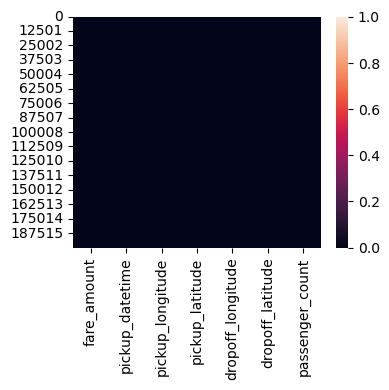

In [13]:
# Vérifier s'il y a des données manquantes:visualisation graphique
plt.figure(figsize=(4,3))
sns.heatmap(df.isna())

### les données aberrantes 



In [14]:
M = df.copy()
df.passenger_count.value_counts()


passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

In [15]:
df[df.passenger_count == 208]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [16]:
df = df[~(df.passenger_count == 0) & ~(df.passenger_count == 208)]
df.shape

(199290, 7)

In [17]:
df.columns


Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [18]:
df = df[
    (df.pickup_latitude < 90) & (df.dropoff_latitude > -90) &
    (df.pickup_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180)&
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180)
]
df.shape


(199278, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_datetime    199278 non-null  object 
 2   pickup_longitude   199278 non-null  float64
 3   pickup_latitude    199278 non-null  float64
 4   dropoff_longitude  199278 non-null  float64
 5   dropoff_latitude   199278 non-null  float64
 6   passenger_count    199278 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [20]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [22]:
df.drop(['pickup_datetime'],axis=1, inplace=True)


In [23]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_longitude   199278 non-null  float64
 2   pickup_latitude    199278 non-null  float64
 3   dropoff_longitude  199278 non-null  float64
 4   dropoff_latitude   199278 non-null  float64
 5   passenger_count    199278 non-null  int64  
 6   year               199278 non-null  int32  
 7   month              199278 non-null  int32  
 8   day                199278 non-null  int32  
 9   hour               199278 non-null  int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 13.7 MB


In [24]:
df.isna().sum()


fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
dtype: int64

In [25]:
df.duplicated().sum()


3

In [27]:
T=df.copy()

In [28]:
duplicates = T[T.duplicated(keep=False)]
duplicates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
64178,5.0,0.0,0.0,0.0,0.0,1,2014,7,13,16
87962,12.5,0.0,0.0,0.0,0.0,1,2011,10,5,10
92070,5.0,0.0,0.0,0.0,0.0,1,2014,7,13,16
116790,8.9,0.0,0.0,0.0,0.0,1,2012,1,27,9
149819,12.5,0.0,0.0,0.0,0.0,1,2011,10,5,10
184856,8.9,0.0,0.0,0.0,0.0,1,2012,1,27,9


In [29]:
df.drop_duplicates(inplace=True)


In [30]:
df.duplicated().sum()


0

In [201]:
#df['monthly_quarter'] = df.month.map({1: 'Q1', 2: 'Q1', 3: 'Q1', 4: 'Q2', 5: 'Q2', 6: 'Q2', 7: 'Q3', 8: 'Q3', 9: 'Q3', 10: 'Q4', 11: 'Q4', 12: 'Q4'})
#df['hourly_segment'] = df.hour.map({0: 'H1', 1: 'H1', 2: 'H1', 3: 'H1', 4: 'H2', 5: 'H2', 6: 'H2', 7: 'H2', 8: 'H3', 9: 'H3', 10: 'H3', 11: 'H3', 12: 'H4', 13: 'H4', 14: 'H4', 15: 'H4', 16: 'H5', 17: 'H5', 18: 'H5', 19: 'H5', 20: 'H6', 21: 'H6', 22: 'H6', 23: 'H6'})
#df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,monthly_quarter,hourly_segment
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,Q2,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,Q3,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,Q3,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,Q2,H3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,Q3,H5
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,Q4,H3
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,Q1,H1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,Q2,H1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,Q2,H4


In [283]:
## Afficher un résumé des données

df.describe(include="object")


ValueError: No objects to concatenate

### Calculer la distance de la course

In [31]:
from geopy.distance import geodesic #pickup-dropoff will give distance
df['distance'] = [round(geodesic((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).km, 2) for i in df.index]

In [32]:
bd = df.copy()

In [33]:
bd.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',], axis=1, inplace=True)


In [34]:
bd

,fare_amount,passenger_count,year,month,day,hour,distance
0,7.5,1,2015,5,7,19,1.68
1,7.7,1,2009,7,17,20,2.45
2,12.9,1,2009,8,24,21,5.04
3,5.3,3,2009,6,26,8,1.66
4,16.0,5,2014,8,28,17,4.48
...,...,...,...,...,...,...,...
199995,3.0,1,2012,10,28,10,0.11
199996,7.5,1,2014,3,14,1,1.88
199997,30.9,2,2009,6,29,0,12.87
199998,14.5,1,2015,5,20,14,3.54


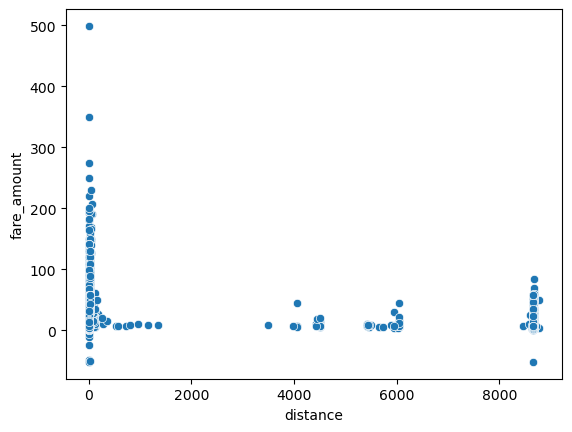

In [35]:
sns.scatterplot(data=bd, x='distance', y='fare_amount')
plt.show()

In [36]:
bd = bd[(bd.fare_amount < 250) & (bd.fare_amount > 0)]
bd = bd[bd.distance < 250]

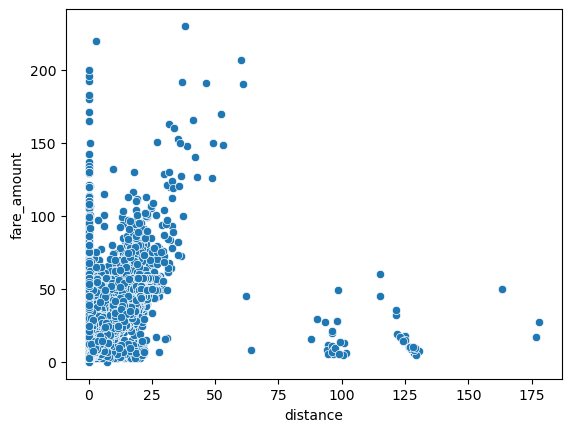

In [37]:
sns.scatterplot(data=bd, x='distance', y='fare_amount')
plt.show()


In [38]:
# outlier
df1 = bd.copy()
features1 = ['fare_amount', 'distance']

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
    
display(df1.head())

,fare_amount,passenger_count,year,month,day,hour,distance
0,7.5,1,2015,5,7,19,1.68
1,7.7,1,2009,7,17,20,2.45
2,12.9,1,2009,8,24,21,5.04
3,5.3,3,2009,6,26,8,1.66
4,16.0,5,2014,8,28,17,4.48


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173737 entries, 0 to 173736
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      173737 non-null  float64
 1   passenger_count  173737 non-null  int64  
 2   year             173737 non-null  int32  
 3   month            173737 non-null  int32  
 4   day              173737 non-null  int32  
 5   hour             173737 non-null  int32  
 6   distance         173737 non-null  float64
dtypes: float64(2), int32(4), int64(1)
memory usage: 6.6 MB


In [40]:
df = df1.copy()


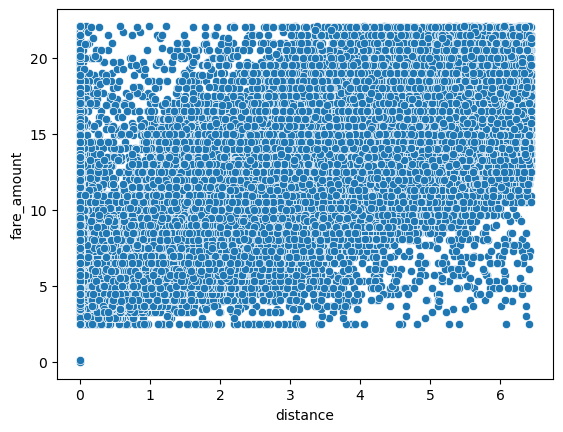

In [41]:
sns.scatterplot(data=df, x='distance', y='fare_amount')
plt.show()

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173737 entries, 0 to 173736
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        173737 non-null  float64
 1   pickup_longitude   173737 non-null  float64
 2   pickup_latitude    173737 non-null  float64
 3   dropoff_longitude  173737 non-null  float64
 4   dropoff_latitude   173737 non-null  float64
 5   passenger_count    173737 non-null  int64  
 6   year               173737 non-null  int32  
 7   day                173737 non-null  int32  
 8   monthly_quarter    173737 non-null  object 
 9   hourly_segment     173737 non-null  object 
 10  distance           173737 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 13.3+ MB


In [213]:
#df_dummy = pd.get_dummies(df[['monthly_quarter', 'hourly_segment']], drop_first= True)
#df_dummy

,monthly_quarter_Q2,monthly_quarter_Q3,monthly_quarter_Q4,hourly_segment_H2,hourly_segment_H3,hourly_segment_H4,hourly_segment_H5,hourly_segment_H6
0,True,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,True
2,False,True,False,False,False,False,False,True
3,True,False,False,False,True,False,False,False
4,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
173732,False,False,False,False,False,True,False,False
173733,False,False,True,False,True,False,False,False
173734,False,False,False,False,False,False,False,False
173735,True,False,False,False,False,True,False,False


In [214]:
#df = pd.concat([df, df_dummy], axis=1)
#df

,fare_amount,passenger_count,year,month,day,hour,monthly_quarter,hourly_segment,distance,monthly_quarter_Q2,monthly_quarter_Q3,monthly_quarter_Q4,hourly_segment_H2,hourly_segment_H3,hourly_segment_H4,hourly_segment_H5,hourly_segment_H6
0,7.5,1,2015,5,7,19,Q2,H5,1.68,True,False,False,False,False,False,True,False
1,7.7,1,2009,7,17,20,Q3,H6,2.45,False,True,False,False,False,False,False,True
2,12.9,1,2009,8,24,21,Q3,H6,5.04,False,True,False,False,False,False,False,True
3,5.3,3,2009,6,26,8,Q2,H3,1.66,True,False,False,False,True,False,False,False
4,16.0,5,2014,8,28,17,Q3,H5,4.48,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173732,12.0,1,2014,1,31,14,Q1,H4,1.12,False,False,False,False,False,True,False,False
173733,3.0,1,2012,10,28,10,Q4,H3,0.11,False,False,True,False,True,False,False,False
173734,7.5,1,2014,3,14,1,Q1,H1,1.88,False,False,False,False,False,False,False,False
173735,14.5,1,2015,5,20,14,Q2,H4,3.54,True,False,False,False,False,True,False,False


In [215]:
#df.drop(['monthly_quarter', 'hourly_segment'], axis=1, inplace=True)


In [80]:
#df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173737 entries, 0 to 173736
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         173737 non-null  float64
 1   pickup_longitude    173737 non-null  float64
 2   pickup_latitude     173737 non-null  float64
 3   dropoff_longitude   173737 non-null  float64
 4   dropoff_latitude    173737 non-null  float64
 5   passenger_count     173737 non-null  int64  
 6   year                173737 non-null  int32  
 7   day                 173737 non-null  int32  
 8   distance            173737 non-null  float64
 9   monthly_quarter_Q2  173737 non-null  bool   
 10  monthly_quarter_Q3  173737 non-null  bool   
 11  monthly_quarter_Q4  173737 non-null  bool   
 12  hourly_segment_H2   173737 non-null  bool   
 13  hourly_segment_H3   173737 non-null  bool   
 14  hourly_segment_H4   173737 non-null  bool   
 15  hourly_segment_H5   173737 non-nul

In [216]:
df2 = df.copy()

In [63]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [64]:
X


,passenger_count,year,month,day,hour,distance
0,1,2015,5,7,19,1.68
1,1,2009,7,17,20,2.45
2,1,2009,8,24,21,5.04
3,3,2009,6,26,8,1.66
4,5,2014,8,28,17,4.48
...,...,...,...,...,...,...
173732,1,2014,1,31,14,1.12
173733,1,2012,10,28,10,0.11
173734,1,2014,3,14,1,1.88
173735,1,2015,5,20,14,3.54


In [44]:
y


0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
173732    12.0
173733     3.0
173734     7.5
173735    14.5
173736    14.1
Name: fare_amount, Length: 173737, dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler
X.tail()

,passenger_count,year,month,day,hour,distance
173732,1,2014,1,31,14,1.12
173733,1,2012,10,28,10,0.11
173734,1,2014,3,14,1,1.88
173735,1,2015,5,20,14,3.54
173736,1,2010,5,15,4,5.41


In [71]:
#standardiser les variables explicatives non binaires
#binary_data = X[["monthly_quarter_Q2", "monthly_quarter_Q3", "monthly_quarter_Q4", "hourly_segment_H2", "hourly_segment_H3", "hourly_segment_H4", "hourly_segment_H5", "hourly_segment_H6"]]
#non_binary_data=X.drop(["monthly_quarter_Q2","monthly_quarter_Q3","monthly_quarter_Q4","hourly_segment_H2","hourly_segment_H3","hourly_segment_H4","hourly_segment_H5","hourly_segment_H6"],axis=1)
scaler=StandardScaler()
Xs=scaler.fit_transform(X)
# enregistrer le  scaler 
joblib.dump(scaler, 'scaler.pkl') 

#transformer les données standardisées en dataframe
Xs=pd.DataFrame(Xs,columns=X.columns,index=X.index)
#Xs_final=pd.concat([Xs,binary_data],axis=1) # ajouter les variables binaires à notre base de données standardisée
#Xs_final.tail()

In [72]:
x_train,x_test,y_train,y_test=train_test_split(Xs,y,test_size=0.3,random_state=42)

In [73]:
x_train

,passenger_count,year,month,day,hour,distance
54955,-0.526761,1.226547,0.213007,-0.311142,-1.647426,0.313686
115405,0.239611,0.150470,0.213007,0.149463,0.218340,-1.052379
104925,2.538726,-0.387569,0.503275,-1.117201,-0.403582,-0.735011
104020,-0.526761,0.150470,0.793543,1.185825,1.462183,0.796639
163716,0.239611,0.150470,-0.657798,0.840371,1.306703,-0.093374
...,...,...,...,...,...,...
119879,-0.526761,1.226547,-0.367530,0.955523,1.462183,-0.879896
103694,-0.526761,0.688509,-0.367530,-0.541445,-0.248102,2.907832
131932,-0.526761,0.688509,1.083812,-0.426293,0.218340,-0.217561
146867,-0.526761,-0.387569,1.374080,0.034312,-0.403582,-0.417642


In [74]:
print(x_train.shape)
print(x_test.shape)

(121615, 6)
(52122, 6)


In [302]:
data12 = X.copy()

### Entrainer un modèle de régression linéaire

In [75]:
# Préciser le modèle
model=LinearRegression()
#entrainer le modèle
model.fit(x_train,y_train)

LinearRegression()

In [76]:
# Afficher les coefs du modèle
print(x_train.columns)
print(f"les coefficients du modèle:{model.coef_}")
print(f"la constante:{model.intercept_}")

Index(['passenger_count', 'year', 'month', 'day', 'hour', 'distance'], dtype='object')
les coefficients du modèle:[0.03700568 0.65399591 0.1723112  0.00973235 0.05103825 2.8059522 ]
la constante:8.547848649376407


In [77]:
# tester la performance du  modèle
pred1=model.predict(x_test)
MSE=mean_squared_error(y_test,pred1)
R2_score=r2_score(y_test,pred1)
print(f'MSE:{MSE.round(2)}')
print(f'R2:{R2_score}')

MSE:5.6
R2:0.5978874091724936


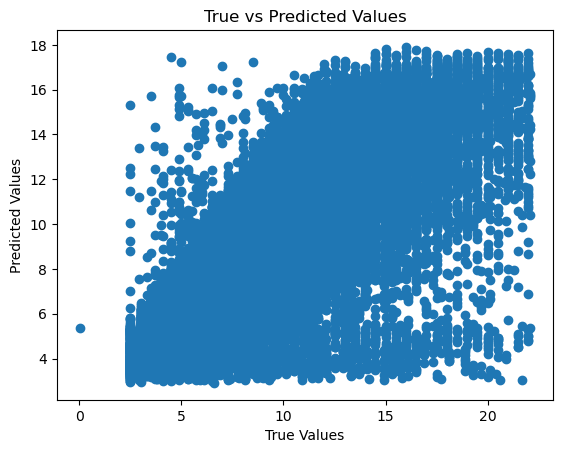

In [78]:
#Visualizing Predictions
plt.scatter(y_test, pred1)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

### Entrainer un modèle de régression Ridge

In [99]:
# soit lambda =0.6, ici le choix n'est pas optimal
model1=Ridge(alpha=2.14)
model1.fit(x_train,y_train)

Ridge(alpha=2.14)

In [100]:
# afficher les coefs
print(x_train.columns)
print(model1.coef_)

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'day', 'distance',
       'monthly_quarter_Q2', 'monthly_quarter_Q3', 'monthly_quarter_Q4',
       'hourly_segment_H2', 'hourly_segment_H3', 'hourly_segment_H4',
       'hourly_segment_H5', 'hourly_segment_H6'],
      dtype='object')
[ 1.10817042e+00  1.13529656e+01  3.02619268e-01 -1.05947171e+01
  4.32554498e-02  6.53221730e-01  1.11196005e-02  2.99080544e+00
  1.65964437e-01  2.09491848e-01  4.77147547e-01 -2.67583602e-01
  7.89547985e-01  8.75553928e-01  6.43874855e-01  1.46153711e-01]


In [101]:
# afficher la val de la cst 
print(model1.intercept_)

7.866782791297819


In [102]:
# tester la performance du modèle
pred2=model1.predict(x_test)
MSE=mean_squared_error(pred2,y_test)
R2_score=r2_score(pred2,y_test)
print(MSE.round(2))
print(R2_score)

5.0
0.4400024909343009


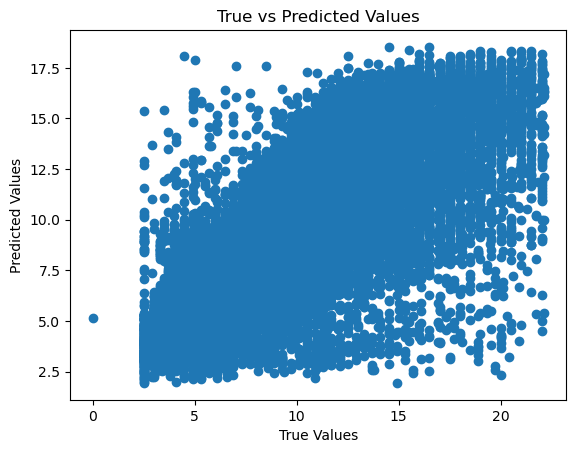

In [103]:
#Visualizing Predictions
plt.scatter(y_test, pred2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

### Entrainer un modèle de régression Lasso

In [307]:
## soit lambda =0.1, ici le choix n'est pas optimal
model2=Lasso(alpha=0.001)
model2.fit(x_train,y_train)

Lasso(alpha=0.001)

In [308]:
## soit lambda =0.1, ici le choix n'est pas optimal
model2=Lasso(alpha=0.001)
model2.fit(x_train,y_train)
# tester la performance du modèle
pred3=model2.predict(x_test)
MSE=mean_squared_error(pred3,y_test)
R2_score=r2_score(pred3,y_test)
print(MSE.round(2))
print(R2_score)

5.6
0.3285607886654984


In [105]:
# afficher les coefs
print(x_train.columns)
print(model2.coef_)

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'day', 'distance',
       'monthly_quarter_Q2', 'monthly_quarter_Q3', 'monthly_quarter_Q4',
       'hourly_segment_H2', 'hourly_segment_H3', 'hourly_segment_H4',
       'hourly_segment_H5', 'hourly_segment_H6'],
      dtype='object')
[ 0.77511292  0.62831628  0.57416592  0.06871183  0.04214327  0.65138636
  0.01002375  2.98839101  0.15027146  0.19351894  0.46153055 -0.28060836
  0.75850619  0.8432575   0.6118616   0.11443307]


In [106]:
# Afficher la val de la cst 
print(model2.intercept_)

7.905557465996784


In [107]:
# tester la performance du modèle
pred3=model2.predict(x_test)
MSE=mean_squared_error(pred3,y_test)
R2_score=r2_score(pred3,y_test)
print(MSE.round(2))
print(R2_score)

5.01
0.43761894963449177


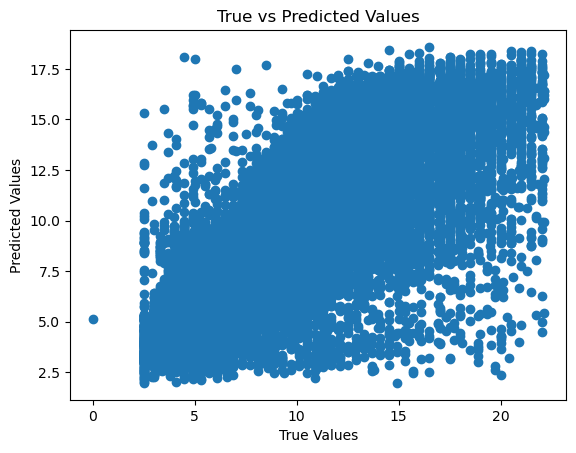

In [108]:
#Visualizing Predictions
plt.scatter(y_test, pred3)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

### Entrainer un modèle de régression ElasticNet

$$ Min_{\beta} \frac{1}{2n}||y-X\beta ||^2_2 +\alpha [\rho||\beta||_1+\frac{(1-\rho)}{2} ||\beta||^2_2]$$

In [109]:
# soient lambda=0.6 et 0.01, le choix n'est pas optimal
model3=ElasticNet(alpha=0.04,l1_ratio=0.001)

In [110]:
model3.fit(x_train,y_train)

ElasticNet(alpha=0.04, l1_ratio=0.001)

In [111]:
print(model3.coef_)
print(model3.intercept_)

[ 0.38904415  0.08648465  0.3879785   0.07368376  0.04019892  0.62130254
  0.00809234  2.84965383  0.07262903  0.10616444  0.33435969 -0.35527398
  0.3986318   0.4670108   0.2876006  -0.11237578]
8.244354626597113


In [112]:
# tester la performance du modèle
pred=model3.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
MSE.round(2)
R2_score

0.37659408511311143

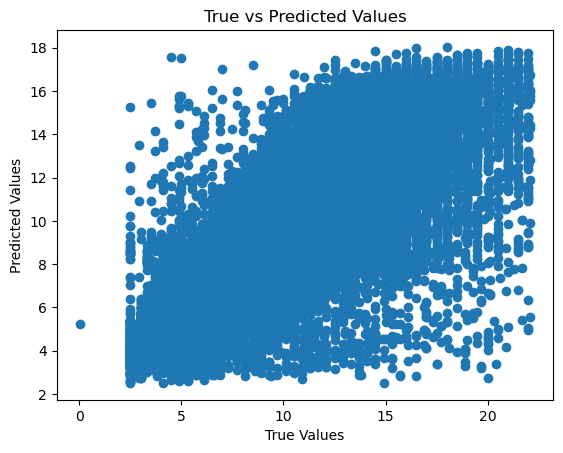

In [113]:
#Visualizing Predictions
plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

### Choisir les valeurs optimales des hyper-paramètres par CV

#### Régression Ridge 

In [309]:
# Préciser les valeurs de lambda à tester 
nb_va=300
# donne des valeurs entre 10^(-3) et 10^(2)
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

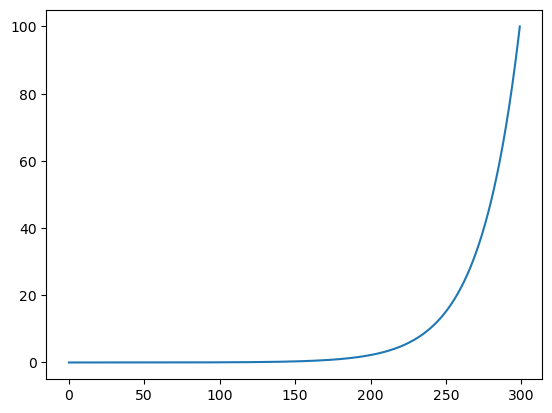

In [310]:
plt.plot(np.arange(300),lambda_values)

In [311]:
# modèle Ridge
model=Ridge()

In [312]:
grid=GridSearchCV(model,lambda_range,scoring="neg_mean_squared_error",
                  cv=5)
#'neg_mean_squared_error' à maximiser (à minimiser mse)

In [313]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-03, 2....
       4.12462638e+01, 4.28654141e+01, 4.45481252e+01, 4.62968923e+01,
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [315]:
# afficher la valeur optimal de lambda
grid.best_params_

{'alpha': 6.251534353689712}

In [316]:
# Entrainer le modèle Ridge avec la valeur optimale de lambda séléctionnée
model=grid.best_estimator_
pred=model.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
print(R2_score)
print(MSE)

0.3289169829282306
5.604087245530617


#### Régression Lasso:

In [317]:
# préciser les valeurs de lambda à tester 
nb_va=30
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

In [318]:
# modèle Lasso
model=Lasso()
grid=GridSearchCV(model,lambda_range,scoring='neg_mean_squared_error',cv=2)
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [319]:
# afficher la valeur optimal de lambda
grid.best_params_

{'alpha': 0.001}

In [320]:
# Entrainer le modèle Ridge avec la valeur optimale de lambda séléctionnée
model=grid.best_estimator_
pred=model.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
MSE
R2_score

0.3285607886654984

5.01
0.43761894963449177


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.378e+04, tolerance: 1.680e+02
  model = cd_fast.enet_coordinate_descent(


#### Régression ElasticNet

In [321]:
nb_val=30 # nbr de valeurs à tester 
lambda_range=np.logspace(-3,2,nb_val) # valeurs de lambda à tester
rho_range=[0.1,0.01,0.001]    # valeurs de rho à tester  
hpers={"alpha":lambda_range,"l1_ratio":rho_range} 

In [322]:
model=ElasticNet()
grid=GridSearchCV(model,hpers,cv=5,scoring="neg_mean_squared_error")

In [323]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02]),
                         'l1_ratio': [0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

In [324]:
# Afficher les valeurs optimales des hyperparamètres
grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1}

In [325]:
#Entrainer le modèle ElasticNet avec les valeurs optimales séléctionnées
# de lambda et de alpha 
model=grid.best_estimator_
pred=model.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
print(MSE)
R2_score

5.604080233296396


0.3283478285398974

In [80]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [79]:
x_train

,passenger_count,year,month,day,hour,distance
54955,-0.526761,1.226547,0.213007,-0.311142,-1.647426,0.313686
115405,0.239611,0.150470,0.213007,0.149463,0.218340,-1.052379
104925,2.538726,-0.387569,0.503275,-1.117201,-0.403582,-0.735011
104020,-0.526761,0.150470,0.793543,1.185825,1.462183,0.796639
163716,0.239611,0.150470,-0.657798,0.840371,1.306703,-0.093374
...,...,...,...,...,...,...
119879,-0.526761,1.226547,-0.367530,0.955523,1.462183,-0.879896
103694,-0.526761,0.688509,-0.367530,-0.541445,-0.248102,2.907832
131932,-0.526761,0.688509,1.083812,-0.426293,0.218340,-0.217561
146867,-0.526761,-0.387569,1.374080,0.034312,-0.403582,-0.417642


In [81]:
joblib.dump(model, 'model.pkl')

['model.pkl']

## Prédiction

In [82]:
# télécharger le  scaler enrigstré aupaavant 
scaler = joblib.load('scaler.pkl')
scaler.feature_names_in_

array(['passenger_count', 'year', 'month', 'day', 'hour', 'distance'],
      dtype=object)

In [90]:
# Les nouvelles données de prédiction
new={
    'passenger_count':[2,1],
    'year':[2024,2025],
    'month':[11,8],
    'day':[21,9],
    'hour':[6,23],
    'distance':[3,1.8] 
    }

New_pd=pd.DataFrame(new)
New_pd

,passenger_count,year,month,day,hour,distance
0,2,2024,11,21,6,3.0
1,1,2025,8,9,23,1.8


In [91]:
# Standardiser les données de prédiction
new_=scaler.transform(New_pd)
new_=pd.DataFrame(new_,columns=New_pd.columns,index=New_pd.index)
new_

,passenger_count,year,month,day,hour,distance
0,0.239611,6.606934,1.374080,0.610069,-1.180984,0.541364
1,-0.526761,7.144973,0.503275,-0.771747,1.462183,-0.286555


In [92]:

# Télécharger le modèle déjà entrainé 
model = joblib.load('model.pkl')
# faire des prédictions
model.predict(new_)

array([14.5790965 , 12.55091597])